<a href="https://colab.research.google.com/github/SebastianRodriguez05/SyS/blob/main/Tarea_2_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Punto # 1
# Semejanzas y diferencias entre las herramientas de Fourier

## Serie de Fourier (exponencial, trigonométrica y compacta)

**Tipo de señal:**

Se aplica a señales periódicas en el tiempo continuo.

**Espectro:**

El espectro es discreto, con componentes en frecuencias armónicas de la frecuencia fundamental.

**Representaciones:**

Trigonométrica: Usa senos y cosenos.

Exponencial: Usa exponentes complejos
$ e^{j\omega t}$

Compacta: Una combinación más simple de las dos anteriores.

**Objetivo:**

Descomponer una señal periódica en componentes armónicas.

##Transformada de Fourier (TF)

**Tipo de señal:**

Se aplica a señales no periódicas en tiempo continuo.

**Espectro:**

El espectro es continuo, representando todas las frecuencias de la señal.

**Propósito:**

Proveer una representación en el dominio de la frecuencia para señales continuas.

##Transformada de Fourier en Tiempo Discreto (DTFT)

**Tipo de señal:**

Se aplica a señales discretas (muestreadas), pero de longitud infinita.

**Espectro:**

Es continuo y periódico, con una periodicidad de $2\pi$ en el dominio de la frecuencia.

**Relación:**

Es una extensión de la Transformada de Fourier para señales discretas.


##Transformada Discreta de Fourier (DFT)

**Tipo de señal:**

Se aplica a señales discretas de longitud finita.

**Espectro:**

Es discreto, obteniendo una cantidad finita de muestras en el dominio de la frecuencia.

**Relación:**

Es una aproximación práctica de la DTFT, utilizada para procesar señales en computadoras.

##Fast Fourier Transform (FFT)

**Definición:**

Es un algoritmo eficiente para calcular la DFT.
Costo computacional:

DFT: Requiere
𝑂
(
𝑁
2
)
O(N
2
 ) operaciones, donde
𝑁
N es el número de puntos.


FFT: Reduce el costo a
𝑂
(
𝑁
log
⁡
𝑁
)
O(NlogN), aprovechando simetrías en las operaciones.

**Importancia:**

Permite realizar análisis de señales en tiempo real y es la base de muchos sistemas modernos, como procesamiento de audio, imágenes y telecomunicaciones.

**Funcionamiento:**

Divide la señal en partes más pequeñas (divide y vencerás).
Calcula la DFT para cada parte.
Combina los resultados para obtener la DFT total.

##Combinaciones señal-espectro

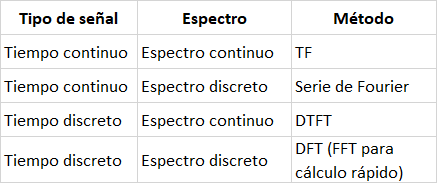

##Punto # 2

##1. Distorsión Total de Armónicos (THD)

La Distorsión Total de Armónicos (THD) mide la cantidad de distorsión en una señal debido a la presencia de armónicos (frecuencias múltiples de la fundamental). Es una métrica clave en circuitos eléctricos para evaluar la calidad de la forma de onda, especialmente en sistemas que utilizan energía eléctrica.

Definición Matemática\
El THD se define como:

$$THD = \frac{\sqrt{V_2+V_3+\cdots V_n}}{V_1}$$

Donde:

$V_1$: Magnitud de la componente fundamental (frecuencia base).

$V_n:$ Magnitudes de las componentes armónicas (n > 1).

##2. Factor de Potencia (PF)
El factor de potencia indica la eficiencia con la que un circuito eléctrico convierte la energía eléctrica en trabajo útil. Está relacionado con el ángulo de fase entre el voltaje y la corriente.

Relación entre THD y PF
El factor de potencia debido a la distorsión armónica se puede calcular como:

$$PF_{THD}=\sqrt{\frac{1}{1+(THD)^2}}$$

Donde:

cos
⁡
(
𝜙
)
cos(ϕ): Factor de potencia debido al desplazamiento de fase.

THD: Contribución de los armónicos.

##3. Cálculo del THD usando FFT
La FFT es una herramienta clave para descomponer una señal periódica en sus componentes de frecuencia. Para calcular el THD desde una señal:

Realiza la FFT de la señal de corriente o voltaje en el circuito.

Identifica la amplitud de la componente fundamental ($V_1$).

Calcula las amplitudes de los armónicos ($V_n$ para n > 1).

Usa la fórmula del THD.


##4. Ejemplo: Rectificador de Onda Completa

Caso 1: Carga Resistiva
La corriente a través de una carga resistiva tiene una forma de onda casi igual al voltaje rectificado, por lo que la distorsión armónica es baja.

Caso 2: Carga RC en Serie
Con una carga RC, la corriente se filtra debido al condensador, lo que afecta las componentes armónicas, reduciendo el THD pero introduciendo un desfase entre corriente y voltaje.




THD Resistiva: 32545.93%
THD RC: 32545.93%


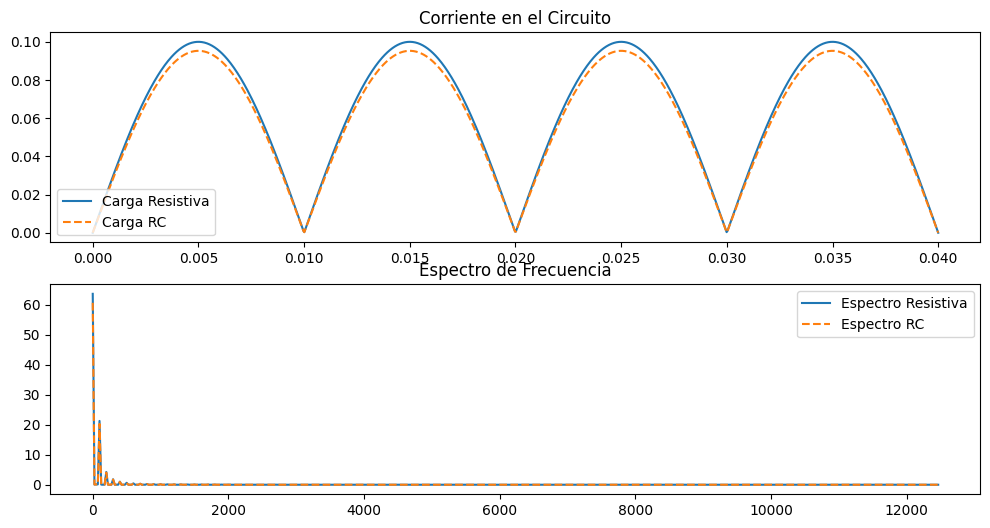

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Parámetros del circuito
R = 10  # Resistencia en ohmios
C = 0.001  # Capacitancia en faradios
f = 50  # Frecuencia de la señal (Hz)
T = 1/f  # Periodo de la señal
t = np.linspace(0, 2*T, 1000)  # 2 ciclos
V = np.abs(np.sin(2 * np.pi * f * t))  # Señal de voltaje rectificada

# Corriente para carga resistiva
I_resistiva = V / R

# Corriente para carga RC
Z = R + 1/(1j*2*np.pi*f*C)  # Impedancia
I_RC = np.abs(V / Z)

# FFT
N = len(t)
fft_resistiva = np.abs(fft(I_resistiva))[:N//2]
fft_RC = np.abs(fft(I_RC))[:N//2]
freqs = np.fft.fftfreq(N, t[1]-t[0])[:N//2]

# Cálculo de THD
V1_resistiva = fft_resistiva[1]
Vn_resistiva = np.sqrt(np.sum(fft_resistiva[2:]**2))
THD_resistiva = (Vn_resistiva / V1_resistiva) * 100

V1_RC = fft_RC[1]
Vn_RC = np.sqrt(np.sum(fft_RC[2:]**2))
THD_RC = (Vn_RC / V1_RC) * 100

print(f"THD Resistiva: {THD_resistiva:.2f}%")
print(f"THD RC: {THD_RC:.2f}%")

# Gráficas
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, I_resistiva, label='Carga Resistiva')
plt.plot(t, I_RC, label='Carga RC', linestyle='--')
plt.legend()
plt.title('Corriente en el Circuito')
plt.subplot(2, 1, 2)
plt.plot(freqs, fft_resistiva, label='Espectro Resistiva')
plt.plot(freqs, fft_RC, label='Espectro RC', linestyle='--')
plt.legend()
plt.title('Espectro de Frecuencia')
plt.show()


##Condiciones para la Simulación

Utilizar un voltaje de entrada senoidal puro.

Considerar valores razonables de
𝑅
R (e.g., 10, 100 ohms) y
𝐶
C (e.g., 1 µF, 10 µF).

Implementar simulaciones en herramientas como Python o MATLAB para calcular el THD y analizar cómo afecta la forma de onda de corriente.


##Discusión de Resultados

Carga Resistiva:

THD es bajo porque la corriente sigue la forma del voltaje.

Factor de potencia cercano a 1.

Carga RC:

THD disminuye con el aumento de
𝐶
C, pero aumenta el desfase entre corriente y voltaje.

Factor de potencia se reduce debido a la contribución del desfase y la distorsión.


## Punto # 3

Aplicacion en comunicaciones - modulacion AM. Consulte en que consiste la
modulacion por amplitud por deteccion coherente y sus aplicaciones. Genere
un ejemplo ilustrativo sobre Python en el que se grafique las senales en el tiempo
y en frecuencia (utilizando la ‘rfft‘) para: senal mensaje tipo pulso rectangular
y senal mensaje tipo coseno. El usuario podra definir el indice de modulacion
de interes. Ver cuaderno Modulacion AM.
La modulacion por amplitud (AM) es un proceso en el que la amplitud de
una senal portadora varıa en funcion de la señal de mensaje. Esta tecnica se
usa ampliamente en comunicaciones como la radiodifusion y las transmisiones
satelitales. Modulacion AM por Deteccion Coherente La deteccion coherente
en AM implica recuperar la senal del mensaje original usando una referencia
de fase sincronizada con la portadora, asegurando una correcta recuperacion
de la senal. Esta tecnica es esencial para la transmision eficiente de senales
moduladas. Aplicaciones de la Modulacion AM La modulacion AM se utiliza
principalmente en la radiodifusion AM, comunicaciones de ondas cortas y en
sistemas de radio y television para transmitir audio y video.

###3.1 Ejemplo de Modulacion AM en Python

En este ejemplo, se genera y grafica una senal AM modulada utilizando diferentes tipos de senales mensaje: un pulso rectangular y un coseno. El codigo
permite al usuario definir el ındice de modulacion. El proceso incluye:
1. Generar una senal/mensaje (pulso rectangular o coseno).
2. Modificar la amplitud de la portadora en funcion de la senal del mensaje.
3. Graficar las senales en los dominios del tiempo y frecuencia.
4. Utilizar la Transformada Rapida de Fourier (FFT) para obtener el espectro
de frecuencia.
El codigo en Python permite ajustar el ındice de modulacion y observar como
afecta a la senal AM, generando graficos del dominio temporal y espectral.